# 시장금리 추이

시장금리, COFIX 엑셀 자료를 통해 분석한다. 통계 엑셀 자료의 구성을 살펴보고

1. [금리 추이 엑셀작업](#금리-엑셀작업)
1. [시장금리 년간 자료](#년간-자료)
1. [시장금리 분기별 자료](#분기별-자료)
1. [시장금리 추이와 COFIX 병합](#시장금리-추이와-COFIX-분석)
1. [시중금리/COFIX/수출입물가 함수](#시중금리/COFIX/수출입물가-함수)


 [시중금리/COFIX/수출입물가 함수](#시중금리/COFIX/수출입물가-함수) 로 통합 함수를 작성했다. 시장금리, COFIX 분석 함수

1. [금리분석 함수 사용](#금리분석-함수-사용)

### - 시장금리 개념

  - 국고채 1년,3년,5년,10년,회사채aa-(3년) : 무담보 채권으로 장외에서 거래되는 시장금리
  - 콜금리(1일물) : 무담보 중개자금 콜금리. 금융기관 간 이루어지는 초단기 대차(貸借)에 적용되는 금리
  - 콜금리 목표 : 한국은행에서 결정하는 목표 콜금리  
  - 예금은행수신금리 : 예금은행 저축성 수신의 가중평균 금리이며, 신규취급액 기준임
  - 예금은행대출금리 : 예금은행 대출의 가중평균 금리이며, 신규취급액 기준임

[시장금리 추이, 의미(e나라지표)](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1073)

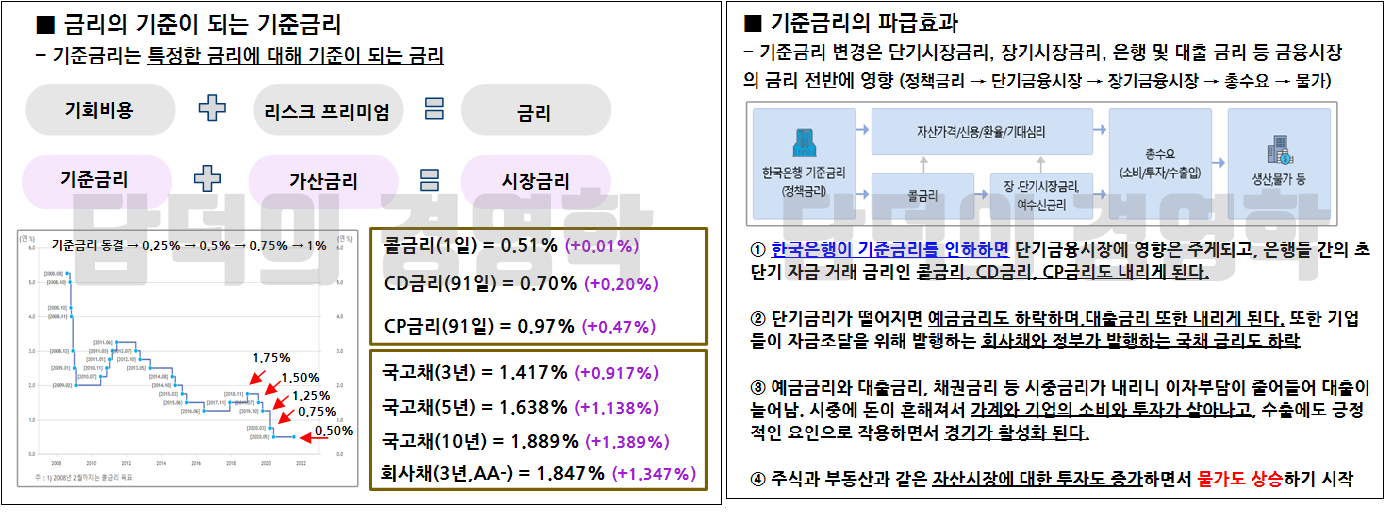 출처: https://bit.ly/3moPpA3

---

# 금리 엑셀작업

외부 금리 엑셀  파일을 다룬다. 금리지표 자료를 처리하기 위한 함수 작업.

1. 년도별 시장금리 추이 엑셀작업
2. COFIX 엑셀 작업
3. 수출입물가지수 엑셀 작업
4. 시장금리(월별) 추이와 COFIX 병합
5. 시중금리+COFIX+수출입물가지수 병합



### - openpyxl 설치

read/write Excel 2010 xlsx/xlsm/xltx/xltm files.

 - https://pypi.org/project/openpyxl/ 
 
```Shell
pip install openpyxl

conda install -c anaconda openpyxl
```


In [1]:
import sys
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 폰트를 적재한다.
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
np.set_printoptions(precision=4)
#pd.options.display.max_rows = 20

## 1. 년도별 시장금리 추이 엑셀작업

e-나라지표의 시장금리 추이를 조회해 `data/시장금리추이_{년월}.xls` 형식으로 저장.

https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1073 의 통계표에서 "시계열 조회"

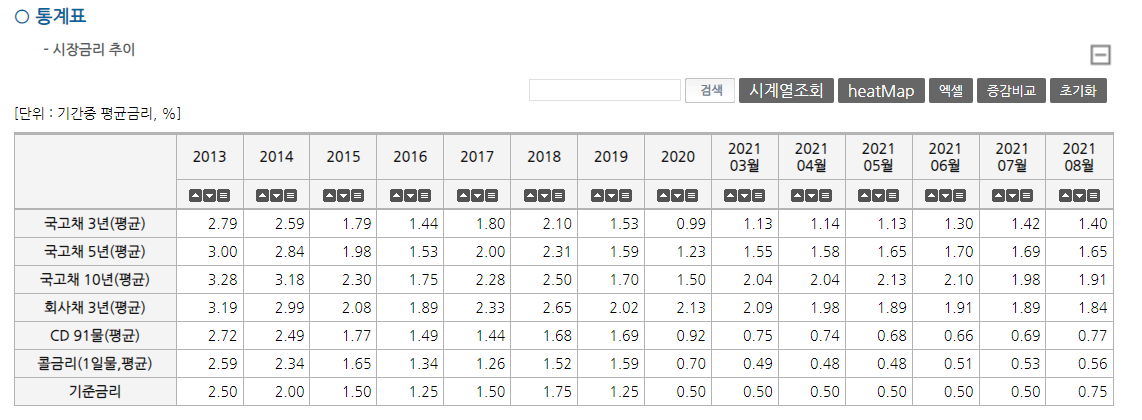

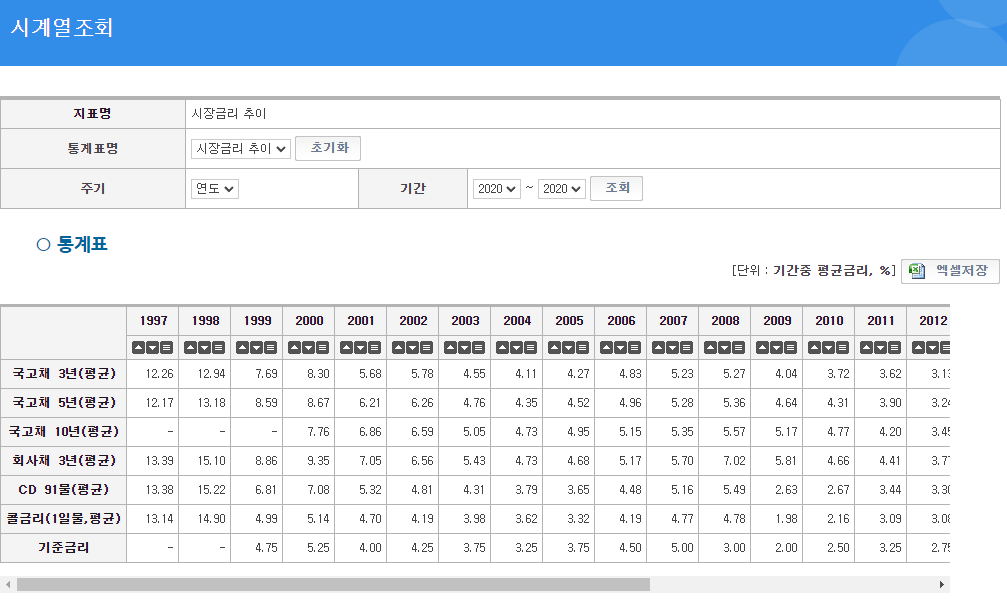

엘셀 형식

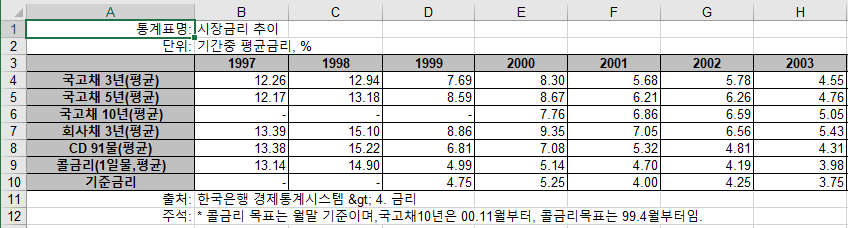

In [2]:
# 2020년 다운로드
df = pd.read_excel('data/시장금리추이_2020.xls', skiprows=2, index_col=0)
df.tail()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CD 91물(평균),13.38,15.22,6.81,7.08,5.32,4.81,4.31,3.79,3.65,4.48,...,3.44,3.30,2.72,2.49,1.77,1.49,1.44,1.68,1.69,0.92
"콜금리(1일물,평균)",13.14,14.90,4.99,5.14,4.70,4.19,3.98,3.62,3.32,4.19,...,3.09,3.08,2.59,2.34,1.65,1.34,1.26,1.52,1.59,0.70
기준금리,-,-,4.75,5.25,4.00,4.25,3.75,3.25,3.75,4.50,...,3.25,2.75,2.50,2.00,1.50,1.25,1.50,1.75,1.25,0.50
출처:,한국은행 경제통계시스템 &gt; 4. 금리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주석:,"* 콜금리 목표는 월말 기준이며,국고채10년은 00.11월부터, 콜금리목표는 99....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 아래 주석부분 제거
df = df.iloc[:-2, :]
df

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
국고채 3년(평균),12.26,12.94,7.69,8.30,5.68,5.78,4.55,4.11,4.27,4.83,...,3.62,3.13,2.79,2.59,1.79,1.44,1.80,2.10,1.53,0.99
국고채 5년(평균),12.17,13.18,8.59,8.67,6.21,6.26,4.76,4.35,4.52,4.96,...,3.90,3.24,3.00,2.84,1.98,1.53,2.00,2.31,1.59,1.23
국고채 10년(평균),-,-,-,7.76,6.86,6.59,5.05,4.73,4.95,5.15,...,4.20,3.45,3.28,3.18,2.30,1.75,2.28,2.50,1.70,1.50
회사채 3년(평균),13.39,15.10,8.86,9.35,7.05,6.56,5.43,4.73,4.68,5.17,...,4.41,3.77,3.19,2.99,2.08,1.89,2.33,2.65,2.02,2.13
CD 91물(평균),13.38,15.22,6.81,7.08,5.32,4.81,4.31,3.79,3.65,4.48,...,3.44,3.30,2.72,2.49,1.77,1.49,1.44,1.68,1.69,0.92
"콜금리(1일물,평균)",13.14,14.90,4.99,5.14,4.70,4.19,3.98,3.62,3.32,4.19,...,3.09,3.08,2.59,2.34,1.65,1.34,1.26,1.52,1.59,0.70
기준금리,-,-,4.75,5.25,4.00,4.25,3.75,3.25,3.75,4.50,...,3.25,2.75,2.50,2.00,1.50,1.25,1.50,1.75,1.25,0.50


In [4]:
# 행-열 전환
df = df.T
df.head()

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
1997,12.26,12.17,-,13.39,13.38,13.14,-
1998,12.94,13.18,-,15.10,15.22,14.90,-
1999,7.69,8.59,-,8.86,6.81,4.99,4.75
2000,8.3,8.67,7.76,9.35,7.08,5.14,5.25
2001,5.68,6.21,6.86,7.05,5.32,4.7,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1997 to 2020
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국고채 3년(평균)   24 non-null     object
 1   국고채 5년(평균)   24 non-null     object
 2   국고채 10년(평균)  24 non-null     object
 3   회사채 3년(평균)   24 non-null     object
 4   CD 91물(평균)   24 non-null     object
 5   콜금리(1일물,평균)  24 non-null     object
 6   기준금리         24 non-null     object
dtypes: object(7)
memory usage: 2.0+ KB


숫자 형식으로 전환
 - 참고: [Pandas의 map함수, apply함수, applymap함수 차이](http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/)

In [7]:
def makefloat(x):
    if x == '-':
        return 0
    return float(x)

In [9]:
df = df.applymap(makefloat)
df.head()

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
1997,12.26,12.17,0.00,13.39,13.38,13.14,0.00
1998,12.94,13.18,0.00,15.10,15.22,14.90,0.00
1999,7.69,8.59,0.00,8.86,6.81,4.99,4.75
2000,8.30,8.67,7.76,9.35,7.08,5.14,5.25
2001,5.68,6.21,6.86,7.05,5.32,4.70,4.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1997 to 2020
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   국고채 3년(평균)   24 non-null     float64
 1   국고채 5년(평균)   24 non-null     float64
 2   국고채 10년(평균)  24 non-null     float64
 3   회사채 3년(평균)   24 non-null     float64
 4   CD 91물(평균)   24 non-null     float64
 5   콜금리(1일물,평균)  24 non-null     float64
 6   기준금리         24 non-null     float64
dtypes: float64(7)
memory usage: 2.0+ KB


In [11]:
df.index

Index(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [13]:
df.loc['2001']

국고채 3년(평균)     5.68
국고채 5년(평균)     6.21
국고채 10년(평균)    6.86
회사채 3년(평균)     7.05
CD 91물(평균)     5.32
콜금리(1일물,평균)    4.70
기준금리           4.00
Name: 2001, dtype: float64

In [14]:
df.iloc[2]

국고채 3년(평균)     7.69
국고채 5년(평균)     8.59
국고채 10년(평균)    0.00
회사채 3년(평균)     8.86
CD 91물(평균)     6.81
콜금리(1일물,평균)    4.99
기준금리           4.75
Name: 1999, dtype: float64

In [17]:
df.columns

Index(['국고채 3년(평균)', '국고채 5년(평균)', '국고채 10년(평균)', '회사채 3년(평균)', 'CD 91물(평균)',
       '콜금리(1일물,평균)', '기준금리'],
      dtype='object')

In [18]:
# 컬럼이름 에러 발생
df.iloc[0:10][['국고채 3년(평균)']].plot()

KeyError: "None of [Index(['국고채 3년(평균)'], dtype='object')] are in the [columns]"

In [19]:
df.columns = ['국고채3년', '국고채5년', '국고채10년', '회사채3년', 'CD91물','콜금리1일물', '기준금리']

<AxesSubplot:>

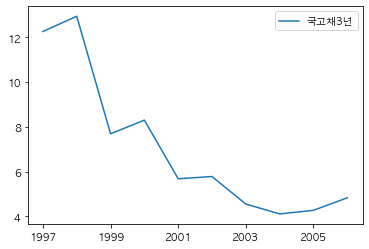

In [20]:
df.iloc[0:10][['국고채3년']].plot()

#### -ex) 2000년 부터 2019년까지 3,5,10년 국고채 그래프


### 년도별 시장금리 `interest_rate_trends()` 함수

```python
def interest_rate_trends(xls_file):
    """
    한국은행 금리추이 엑셀 파일 - 년간, 월간, 분기 파일을 읽어서 Dataframe 으로 반환한다.
    인덱스는 대상월 컬럼인 0번 컬럼을 지정해서 사용한다.
    
    interest_rate_trends(xls_file)
    """  
    df = pd.read_excel(xls_file, skiprows=2, index_col=0)
    df = df.iloc[:-2, :]
    df = df.T
    df = df.applymap(makefloat)
  
    # 월별자료에 '월'이 포함
    if all(df.index.str.endswith('월')):
        df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)
    
    return df
```

---

# COFIX 엑셀 작업

은행연합회 홈페이지 COFIX 통계 엑셀 자료 처리
 -  https://portal.kfb.or.kr/fingoods/cofix.php?BasicYear_W=&BasicYear=2017

신규취급액기준 및 잔액기준 COFIX는 2010년 2월 16일부터 공시되고 있으며,  신 잔액기준 COFIX는 2019년 7월 15일부터 공시되고 있습니다.
 
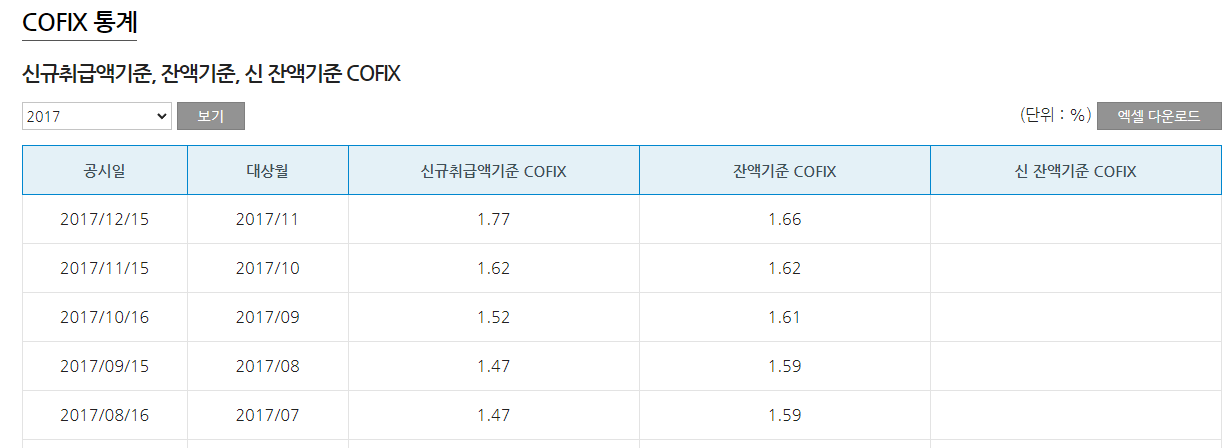

엑셀

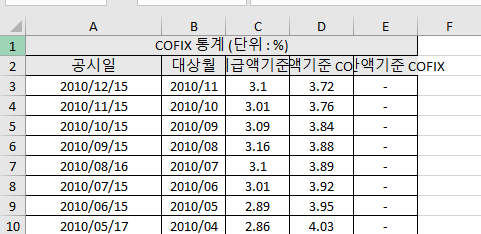

In [21]:
# 2010-2020년도
cofix10_20 = pd.read_excel('data/COFIX통계(2010_2020).xlsx', skiprows=1, index_col=1)
cofix10_20

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2010/11,2010/12/15,3.10,3.72,-
2010/10,2010/11/15,3.01,3.76,-
2010/09,2010/10/15,3.09,3.84,-
2010/08,2010/09/15,3.16,3.88,-
2010/07,2010/08/16,3.10,3.89,-
...,...,...,...,...
2020/04,2020/05/15,1.20,1.61,1.31
2020/03,2020/04/16,1.26,1.66,1.38
2020/02,2020/03/16,1.43,1.72,1.44


정렬

In [22]:
cofix10_20.sort_values(by='대상월', ascending=True, inplace=True)
cofix10_20.head()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2010/01,2010/02/16,3.88,4.11,-
2010/02,2010/03/15,3.62,4.10,-
2010/03,2010/04/15,3.26,4.11,-
2010/04,2010/05/17,2.86,4.03,-
2010/05,2010/06/15,2.89,3.95,-


<AxesSubplot:xlabel='대상월'>

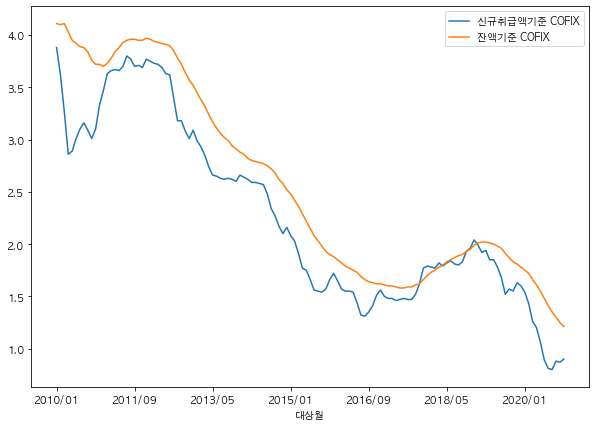

In [26]:
# 2010-2020년도 코픽스 그래프
cofix10_20[['신규취급액기준 COFIX','잔액기준 COFIX','신 잔액기준 COFIX']].plot(figsize=(10,7))

In [61]:
# 2021년도
cofix21 = pd.read_excel('data/시장금리/COFIX통계(2021년도)_20210626.xlsx', skiprows=1, index_col=1)
cofix21.sort_values(by='대상월', ascending=True, inplace=True)
cofix21.tail()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2021/01,2021/02/15,0.86,1.13,0.90
2021/02,2021/03/15,0.83,1.09,0.87
2021/03,2021/04/15,0.84,1.06,0.84
2021/04,2021/05/17,0.82,1.04,0.81
2021/05,2021/06/15,0.82,1.02,0.81


<AxesSubplot:xlabel='대상월'>

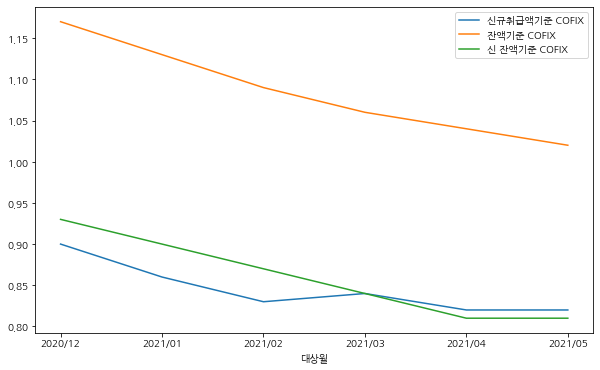

In [62]:
cofix21[['신규취급액기준 COFIX','잔액기준 COFIX','신 잔액기준 COFIX']].plot()

#### 2021년 병합

In [64]:
pd.concat([cofix10_20, cofix21])

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2010/01,2010/02/16,3.88,4.11,-
2010/02,2010/03/15,3.62,4.10,-
2010/03,2010/04/15,3.26,4.11,-
2010/04,2010/05/17,2.86,4.03,-
2010/05,2010/06/15,2.89,3.95,-
...,...,...,...,...
2021/01,2021/02/15,0.86,1.13,0.9
2021/02,2021/03/15,0.83,1.09,0.87
2021/03,2021/04/15,0.84,1.06,0.84


### `cofix_rates()` 함수 작업

```python
def cofix_rates(before, thisyear):
    cofix1 = pd.read_excel(before, skiprows=1, index_col=1)
    cofix2 = pd.read_excel(thisyear, skiprows=1, index_col=1)
    df = pd.concat([cofix1, cofix2])
    df.sort_values(by='대상월', ascending=True, inplace=True)
    return df
```

In [29]:
cofix = cofix_rates('data/COFIX통계(2010_2020).xlsx', 'data/COFIX통계(2021년도)_20210626.xlsx')

In [30]:
cofix.head()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2010/01,2010/02/16,3.88,4.11,-
2010/02,2010/03/15,3.62,4.10,-
2010/03,2010/04/15,3.26,4.11,-
2010/04,2010/05/17,2.86,4.03,-
2010/05,2010/06/15,2.89,3.95,-


In [31]:
cofix.tail()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2021/01,2021/02/15,0.86,1.13,0.9
2021/02,2021/03/15,0.83,1.09,0.87
2021/03,2021/04/15,0.84,1.06,0.84
2021/04,2021/05/17,0.82,1.04,0.81
2021/05,2021/06/15,0.82,1.02,0.81


In [32]:
cofix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 2010/01 to 2021/05
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   공시일            137 non-null    object 
 1   신규취급액기준 COFIX  137 non-null    float64
 2   잔액기준 COFIX     137 non-null    float64
 3   신 잔액기준 COFIX   137 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.4+ KB


---

# 월별 시장금리 추이와 COFIX 병합

월별 시장금리 추이 자료와 COFIX 월별 자료를 합병한다.

interest_rate_trendsa() 메서드에 월별 자료인경우 '월'을 제거하도록 했다. 파일로 작업하면 아래 과정을 거쳐야 한다.

```python
df = pd.read_excel('data/시장금리/시장금리추이_200101-202105.xls', skiprows=2, index_col=0)
df = df.iloc[:-2, :] # 파일 마지막 2줄 제거.
df = df.T
df.head()
# 대상월 인덱서에서 '월' 제거
df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)
df.head()
````

In [36]:
df = interest_rate_trends('data/시장금리/시장금리추이_200101-202105.xls')
df.tail()

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
2021/01,0.98,1.32,1.73,2.14,0.68,0.49,0.5
2021/02,1.00,1.35,1.85,2.06,0.73,0.49,0.5
2021/03,1.13,1.55,2.04,2.09,0.75,0.49,0.5
2021/04,1.14,1.58,2.04,1.98,0.74,0.48,0.5
2021/05,1.13,1.65,2.13,1.89,0.68,0.48,0.5


In [38]:
# COFIX가 2010년 부터 시작되서 2010년 자료만 추출.
df = df[df.index > '2009/12']

df.reset_index(inplace=True)

cofix = cofix_rates('data/시장금리/COFIX통계(2010_2020).xlsx', 'data/시장금리/COFIX통계(2021년도)_20210626.xlsx')

In [25]:
cofix.head()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX
대상월,,,,
2010/01,2010/02/16,3.88,4.11,-
2010/02,2010/03/15,3.62,4.10,-
2010/03,2010/04/15,3.26,4.11,-
2010/04,2010/05/17,2.86,4.03,-
2010/05,2010/06/15,2.89,3.95,-


In [40]:
df.shape, cofix.shape

((137, 8), (137, 4))

In [41]:
interrest_cofix = pd.merge(cofix, df, how='left', left_on='대상월', right_on='index')
interrest_cofix.head()

,공시일,신규취급액기준 COFIX,잔액기준 COFIX,신 잔액기준 COFIX,index,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
0,2010/02/16,3.88,4.11,-,2010/01,4.29,4.84,5.35,5.40,2.88,2.00,2.0
1,2010/03/15,3.62,4.10,-,2010/02,4.19,4.76,5.30,5.32,2.88,2.00,2.0
2,2010/04/15,3.26,4.11,-,2010/03,3.94,4.47,4.92,5.02,2.83,2.01,2.0
3,2010/05/17,2.86,4.03,-,2010/04,3.77,4.44,4.91,4.69,2.51,2.00,2.0
4,2010/06/15,2.89,3.95,-,2010/05,3.70,4.41,4.95,4.48,2.45,2.01,2.0


In [198]:
interrest_cofix = interrest_cofix.set_index('index')

In [199]:
interrest_cofix['신 잔액기준 COFIX'] = interrest_cofix['신 잔액기준 COFIX'].apply(makefloat)

In [200]:
interrest_cofix.columns = ['공시일', '신규취급액COFIX', '잔액기준COFIX', '신잔액기준COFIX', \
                           '국고채3년', '국고채5년', '국고채10년', \
                           '회사채3년', 'CD 91물', '콜금리1일물', '기준금리']

### Interest Rates와 COFIX 합성 함수

```python
def merge_interest_cofix(inrst_file, cofix_prev, cofix_current):
    df = interest_rate_trends(inrst_file)
    
    # COFIX가 2010년 부터 시작되서 2010년 자료만 추출.
    df = df[df.index > '2009/12']
    df.reset_index(inplace=True)

    cofix = cofix_rates(cofix_prev, cofix_current)
    
    interrest_cofix = pd.merge(cofix, df, how='left', left_on='대상월', right_on='index')
    interrest_cofix = interrest_cofix.set_index('index')
    interrest_cofix['신 잔액기준 COFIX'] = interrest_cofix['신 잔액기준 COFIX'].apply(makefloat)
    interrest_cofix.columns = ['공시일', '신규취급액COFIX', '잔액기준COFIX', '신잔액기준COFIX', \
                           '국고채3년', '국고채5년', '국고채10년', \
                           '회사채3년', 'CD 91물', '콜금리1일물', '기준금리']
    return interrest_cofix
```

In [21]:
interrest_cofix = merge_interest_cofix('data/시장금리/시장금리추이_200101-202105.xls',
                          'data/시장금리/COFIX통계(2010_2020).xlsx', 
                          'data/시장금리/COFIX통계(2021년도)_20210626.xlsx')

<AxesSubplot:xlabel='index'>

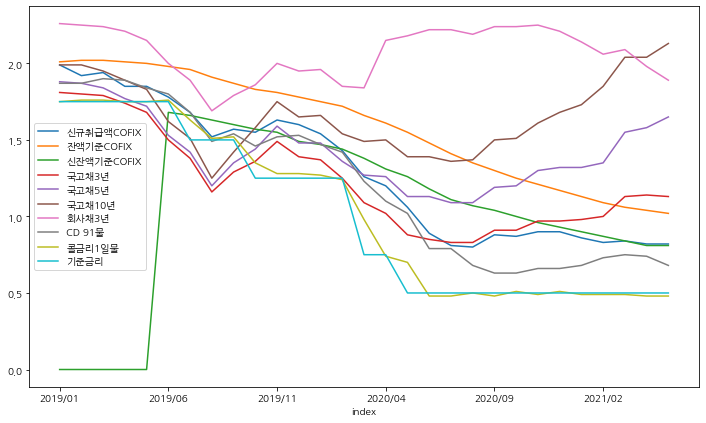

In [22]:
interrest_cofix[interrest_cofix.index > '2018/12'].plot(figsize=(12,7))

# 가계/기업 대출금리

# 수출입물가지수 엑셀 작업

수출입물가지수
- https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1062

201001-202105 까지 시장금리 + COFIX 자료에 수출입물가지수를 병합하는 과정이다.

In [18]:
importexport = pd.read_excel('data/수출입물가지수-2002_202105.xls', skiprows=2, index_col=0)
importexport = importexport.iloc[:-1, :]
importexport = importexport.T
importexport

,수출물가,- 농림수산품,- 공업제품,수입물가,- 원자재,- 중간재,- 최종재
200201월,-12.1,4.8,-12.2,-10.6,-12.4,-4.1,2.4
200202월,-7.9,-1.3,-8.0,-9.1,-10.8,-3.0,2.6
200203월,-6.0,-8.0,-6.0,-5.9,-6.9,-2.9,1.8
200204월,-7.4,-8.3,-7.4,-6.6,-7.2,-4.9,-0.7
200205월,-8.4,-13.8,-8.4,-8.3,-9.0,-6.1,-2.0
...,...,...,...,...,...,...,...
202101월,-1.9,-5.8,-1.9,-5.8,-13.8,-1.9,-3.5
202102월,0.6,-6.6,0.7,-0.3,0.1,1.7,-4.0
202103월,5.9,-7.9,6.0,9.0,27.8,8.0,-4.8
202104월,11.1,-4.2,11.2,15.3,51.7,11.9,-4.7


In [ ]:
# 인덱스 월 제거: Y/m 형식
df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)

```python
def importexport_price(xls_file):
    """
    한국은행 수출입물가지수 월별.
    
    importexport_price(xls_file)
    """  
    df = pd.read_excel(xls_file, skiprows=2, index_col=0)
    df = df.iloc[:-1, :]
    df = df.T
    df = df.applymap(makefloat)
  
    # 월별자료에 '월'이 포함
    if all(df.index.str.endswith('월')):
        df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)
    
    return df
```

## 시중금리+COFIX+수출입물가지수 병합

병합한 자료는 `dataset/시장금리COFIX수출입지수(201001_202105).csv` 파일로 저장된다.

In [21]:
interrest_cofix = merge_interest_cofix('data/시장금리/시장금리추이_200101-202105.xls',
                          'data/시장금리/COFIX통계(2010_2020).xlsx', 
                          'data/시장금리/COFIX통계(2021년도)_20210626.xlsx')

In [35]:
importexport = importexport_price('data/수출입물가지수-2002_202105.xls')
importexport

,수출물가,- 농림수산품,- 공업제품,수입물가,- 원자재,- 중간재,- 최종재
2002/01,-12.1,4.8,-12.2,-10.6,-12.4,-4.1,2.4
2002/02,-7.9,-1.3,-8.0,-9.1,-10.8,-3.0,2.6
2002/03,-6.0,-8.0,-6.0,-5.9,-6.9,-2.9,1.8
2002/04,-7.4,-8.3,-7.4,-6.6,-7.2,-4.9,-0.7
2002/05,-8.4,-13.8,-8.4,-8.3,-9.0,-6.1,-2.0
...,...,...,...,...,...,...,...
2021/01,-1.9,-5.8,-1.9,-5.8,-13.8,-1.9,-3.5
2021/02,0.6,-6.6,0.7,-0.3,0.1,1.7,-4.0
2021/03,5.9,-7.9,6.0,9.0,27.8,8.0,-4.8
2021/04,11.1,-4.2,11.2,15.3,51.7,11.9,-4.7


In [39]:
importexport.columns=['수출물가','수출농림수산', '수출공업', '수입물가', '수입원자재', '수입중간재', '수입최종재']
importexport.head(2)

,수출물가,수출농림수산,수출공업,수입물가,수입원자재,수입중간재,수입최종재
2002/01,-12.1,4.8,-12.2,-10.6,-12.4,-4.1,2.4
2002/02,-7.9,-1.3,-8.0,-9.1,-10.8,-3.0,2.6


In [40]:
# 2010년 이후 자료
importexport = importexport.loc[importexport.index > '2009/12']
importexport

,수출물가,수출농림수산,수출공업,수입물가,수입원자재,수입중간재,수입최종재
2010/01,-6.2,-4.1,-6.3,-0.1,16.2,-5.9,-12.4
2010/02,-9.5,-7.8,-9.5,-3.6,12.4,-9.1,-15.7
2010/03,-11.3,-0.1,-11.4,-4.0,12.0,-9.3,-17.3
2010/04,-5.3,16.0,-5.5,5.0,25.0,-0.9,-12.4
2010/05,1.6,19.2,1.5,11.3,26.6,7.2,-4.9
...,...,...,...,...,...,...,...
2021/01,-1.9,-5.8,-1.9,-5.8,-13.8,-1.9,-3.5
2021/02,0.6,-6.6,0.7,-0.3,0.1,1.7,-4.0
2021/03,5.9,-7.9,6.0,9.0,27.8,8.0,-4.8
2021/04,11.1,-4.2,11.2,15.3,51.7,11.9,-4.7


In [42]:
rates_cofix_prices = pd.merge(interrest_cofix, importexport, left_index=True, right_index=True)
rates_cofix_prices.head(3)

,공시일,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,회사채3년,CD 91물,콜금리1일물,기준금리,수출물가,수출농림수산,수출공업,수입물가,수입원자재,수입중간재,수입최종재
index,,,,,,,,,,,,,,,,,,
2010/01,2010/02/16,3.88,4.11,0.0,4.29,4.84,5.35,5.40,2.88,2.00,2.0,-6.2,-4.1,-6.3,-0.1,16.2,-5.9,-12.4
2010/02,2010/03/15,3.62,4.10,0.0,4.19,4.76,5.30,5.32,2.88,2.00,2.0,-9.5,-7.8,-9.5,-3.6,12.4,-9.1,-15.7
2010/03,2010/04/15,3.26,4.11,0.0,3.94,4.47,4.92,5.02,2.83,2.01,2.0,-11.3,-0.1,-11.4,-4.0,12.0,-9.3,-17.3


In [43]:
rates_cofix_prices.to_csv('dataset/시장금리COFIX수출입지수(201001_202105).csv')

---

# 시중금리/COFIX/수출입물가 분석

Dataset `'dataset/시장금리COFIX수출입지수(201001_202105).csv'` 파일을 이용

In [45]:
df = pd.read_csv('dataset/시장금리COFIX수출입지수(201001_202105).csv', index_col=0)
df.head(3)

,공시일,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,회사채3년,CD 91물,콜금리1일물,기준금리,수출물가,수출농림수산,수출공업,수입물가,수입원자재,수입중간재,수입최종재
index,,,,,,,,,,,,,,,,,,
2010/01,2010/02/16,3.88,4.11,0.0,4.29,4.84,5.35,5.40,2.88,2.00,2.0,-6.2,-4.1,-6.3,-0.1,16.2,-5.9,-12.4
2010/02,2010/03/15,3.62,4.10,0.0,4.19,4.76,5.30,5.32,2.88,2.00,2.0,-9.5,-7.8,-9.5,-3.6,12.4,-9.1,-15.7
2010/03,2010/04/15,3.26,4.11,0.0,3.94,4.47,4.92,5.02,2.83,2.01,2.0,-11.3,-0.1,-11.4,-4.0,12.0,-9.3,-17.3


In [51]:
target = df[['신규취급액COFIX', '잔액기준COFIX', '신잔액기준COFIX', '국고채3년', '국고채5년', '국고채10년', '기준금리', '수출물가', '수입물가']]
target.head(3)

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
index,,,,,,,,,
2010/01,3.88,4.11,0.0,4.29,4.84,5.35,2.0,-6.2,-0.1
2010/02,3.62,4.10,0.0,4.19,4.76,5.30,2.0,-9.5,-3.6
2010/03,3.26,4.11,0.0,3.94,4.47,4.92,2.0,-11.3,-4.0


<AxesSubplot:xlabel='index'>

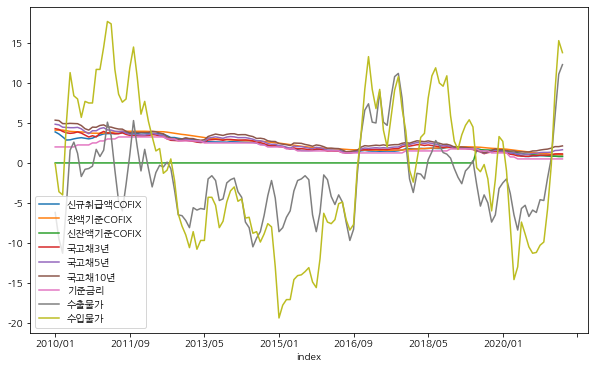

In [52]:
plt.rc('axes', unicode_minus=False)
target.plot()

In [53]:
target.describe()

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,2.205547,2.505985,0.215766,2.275182,2.501022,2.781168,1.885036,-2.002920,-0.862774
std,0.890595,0.961339,0.486352,0.913575,0.990696,1.044027,0.796946,4.797471,8.895290
min,0.800000,1.020000,0.000000,0.830000,1.090000,1.250000,0.500000,-11.300000,-19.400000
25%,1.540000,1.730000,0.000000,1.630000,1.740000,1.990000,1.250000,-5.700000,-7.900000
50%,1.910000,2.020000,0.000000,2.100000,2.300000,2.490000,1.750000,-2.100000,-1.000000
75%,2.990000,3.570000,0.000000,2.910000,3.180000,3.540000,2.500000,0.600000,6.800000
max,3.880000,4.110000,1.680000,4.290000,4.840000,5.350000,3.250000,12.300000,17.700000


In [55]:
normal = target / target.sum().astype(float)
normal.head(3)

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
index,,,,,,,,,
2010/01,0.012841,0.011971,0.0,0.013763,0.014126,0.014041,0.007744,0.022595,0.000846
2010/02,0.011980,0.011942,0.0,0.013442,0.013892,0.013910,0.007744,0.034621,0.030457
2010/03,0.010789,0.011971,0.0,0.012640,0.013046,0.012913,0.007744,0.041181,0.033841


In [56]:
normal.describe()

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.007299,0.007299,0.007299,0.007299,0.007299,0.007299,0.007299,0.007299,0.007299
std,0.002947,0.002800,0.016453,0.002931,0.002891,0.002740,0.003086,0.017483,0.075256
min,0.002648,0.002971,0.000000,0.002663,0.003181,0.003281,0.001936,-0.044825,-0.149746
25%,0.005097,0.005039,0.000000,0.005229,0.005078,0.005223,0.004840,-0.002187,-0.057530
50%,0.006321,0.005884,0.000000,0.006737,0.006713,0.006535,0.006776,0.007653,0.008460
75%,0.009895,0.010398,0.000000,0.009336,0.009281,0.009291,0.009681,0.020773,0.066836
max,0.012841,0.011971,0.056834,0.013763,0.014126,0.014041,0.012585,0.041181,0.164129


정규화 작업을 해서 살펴보자.

In [64]:
normal = (target - target.mean()) / (target.max()-target.min())
normal.head(3)

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
index,,,,,,,,,
2010/01,0.543653,0.519099,-0.128432,0.582317,0.623727,0.626544,0.041805,-0.177842,0.020560
2010/02,0.459238,0.515862,-0.128432,0.553415,0.602394,0.614349,0.041805,-0.317673,-0.073780
2010/03,0.342355,0.519099,-0.128432,0.481161,0.525061,0.521666,0.041805,-0.393944,-0.084561


In [65]:
normal.describe()

,신규취급액COFIX,잔액기준COFIX,신잔액기준COFIX,국고채3년,국고채5년,국고채10년,기준금리,수출물가,수입물가
count,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,2.447353e-16,-6.077863e-17,2.658052e-16,-3.833106e-16,-1.053496e-16,-6.280459e-16,-1.085912e-16,-9.238352e-17,1.539725e-17
std,2.891544e-01,3.111130e-01,2.894950e-01,2.640390e-01,2.641856e-01,2.546408e-01,2.897987e-01,2.032827e-01,2.397652e-01
min,-4.563466e-01,-4.809014e-01,-1.284324e-01,-4.176828e-01,-3.762725e-01,-3.734556e-01,-5.036496e-01,-3.939441e-01,-4.996557e-01
25%,-2.160868e-01,-2.511280e-01,-1.284324e-01,-1.864689e-01,-2.029392e-01,-1.929678e-01,-2.309224e-01,-1.566559e-01,-1.896826e-01
50%,-9.595696e-02,-1.572768e-01,-1.284324e-01,-5.063078e-02,-5.360584e-02,-7.101656e-02,-4.910418e-02,-4.113572e-03,-3.698821e-03
75%,2.546924e-01,3.443413e-01,-1.284324e-01,1.834733e-01,1.810608e-01,1.850810e-01,2.236231e-01,1.102932e-01,2.065438e-01
max,5.436534e-01,5.190986e-01,8.715676e-01,5.823172e-01,6.237275e-01,6.265444e-01,4.963504e-01,6.060559e-01,5.003443e-01


In [77]:
from sklearn import preprocessing

In [78]:
normal = preprocessing.scale(target)
normal

array([[-1.887 , -1.6746, -0.4453, ...,  0.1448, -0.8781,  0.0861],
       [-1.594 , -1.6642, -0.4453, ...,  0.1448, -1.5684, -0.3088],
       [-1.1883, -1.6746, -0.4453, ...,  0.1448, -1.945 , -0.354 ],
       ...,
       [ 1.5389,  1.5097,  1.2882, ..., -1.7443,  1.6534,  1.1128],
       [ 1.5615,  1.5305,  1.2263, ..., -1.7443,  2.7412,  1.8237],
       [ 1.5615,  1.5514,  1.2263, ..., -1.7443,  2.9923,  1.6544]])

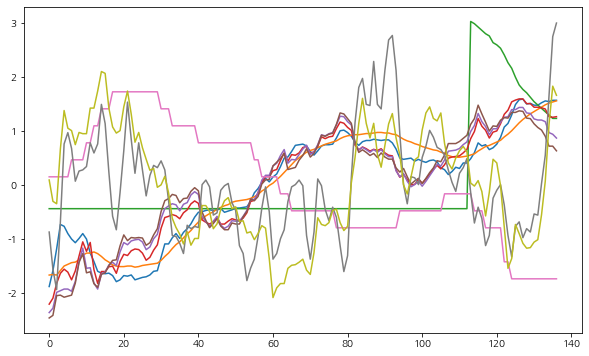

In [82]:
plt.plot(normal)

In [67]:
normal.drop(columns=['신잔액기준COFIX'], inplace=True)

<AxesSubplot:xlabel='index'>

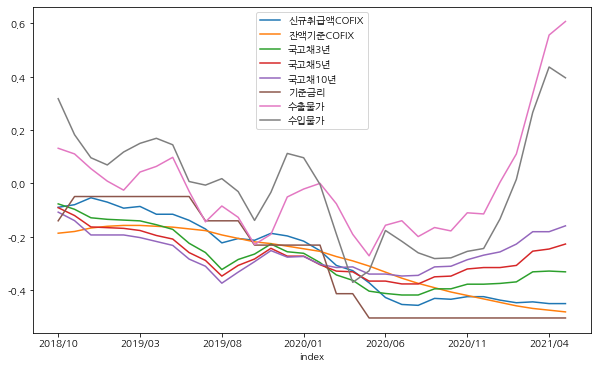

In [68]:
normal.loc[normal.index > '2018/09'].plot()

<AxesSubplot:xlabel='index'>

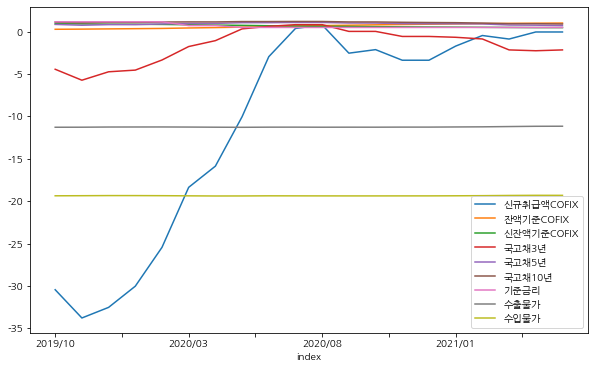

In [74]:
normal.loc[normal.index > '2019/09'].plot()

----

# 시중금리/COFIX/수출입물가 함수



In [2]:
def makefloat(x):
    if x == '-':
        return 0
    return float(x)

def interest_rate_trends(xls_file):
    """
    한국은행 금리추이 엑셀 파일 - 년간, 월간, 분기 파일을 읽어서 Dataframe 으로 반환한다.
    인덱스는 대상월 컬럼인 0번 컬럼을 지정해서 사용한다.
    
    interest_rate_trends(xls_file)
    """  
    df = pd.read_excel(xls_file, skiprows=2, index_col=0)
    df = df.iloc[:-2, :]
    df = df.T
    df = df.applymap(makefloat)
  
    # 월별자료에 '월'이 포함
    if all(df.index.str.endswith('월')):
        df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)
    
    return df


In [3]:
def cofix_rates(before, thisyear):
    """
    은행연합회 COFIX 공시 엑셀을 다운받아 2010~2020년 자료와 올해 자료를 합한다.
    """
    cofix1 = pd.read_excel(before, skiprows=1, index_col=1)
    cofix2 = pd.read_excel(thisyear, skiprows=1, index_col=1)
    df = pd.concat([cofix1, cofix2])
    df.sort_values(by='대상월', ascending=True, inplace=True)
    return df

In [4]:
def merge_interest_cofix(inrst_file, cofix_prev, cofix_current):
    """
    월별 시장금리추세 파일과 코픽스 파일을 병합한다.
    
    merge_interest_cofix(inrst_file, cofix_prev, cofix_current):
      - inrst_file: 월별 시장금리 추기 파일
      - cofix_prev: 2010년 부터 전해 까지 코픽스 파일
      - cofix_current: 올해 코픽스 파일
    """
    df = interest_rate_trends(inrst_file)
    
    # COFIX가 2010년 부터 시작되서 2010년 자료만 추출.
    df = df[df.index > '2009/12']
    df.reset_index(inplace=True)

    cofix = cofix_rates(cofix_prev, cofix_current)
    
    interrest_cofix = pd.merge(cofix, df, how='left', left_on='대상월', right_on='index')
    interrest_cofix = interrest_cofix.set_index('index')
    interrest_cofix['신 잔액기준 COFIX'] = interrest_cofix['신 잔액기준 COFIX'].apply(makefloat)
    interrest_cofix.columns = ['공시일', '신규취급액COFIX', '잔액기준COFIX', '신잔액기준COFIX', \
                           '국고채3년', '국고채5년', '국고채10년', \
                           '회사채3년', 'CD 91물', '콜금리1일물', '기준금리']
    return interrest_cofix

In [19]:
def importexport_price(xls_file):
    """
    한국은행 수출입물가지수 월별.
    
    importexport_price(xls_file)
    """  
    df = pd.read_excel(xls_file, skiprows=2, index_col=0)
    df = df.iloc[:-1, :]
    df = df.T
    df = df.applymap(makefloat)
  
    # 월별자료에 '월'이 포함
    if all(df.index.str.endswith('월')):
        df.index = df.index.str.slice(start=0, stop=4) + '/' + df.index.str.slice(start=4, stop=6)
    
    return df


----

# 금리분석 함수 사용

1. [시중금리/COFIX/수출입물가 분석](#시중금리/COFIX/수출입물가-분석)

# 년간 자료

https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1073 의 통계표에서 "시계열 조회"

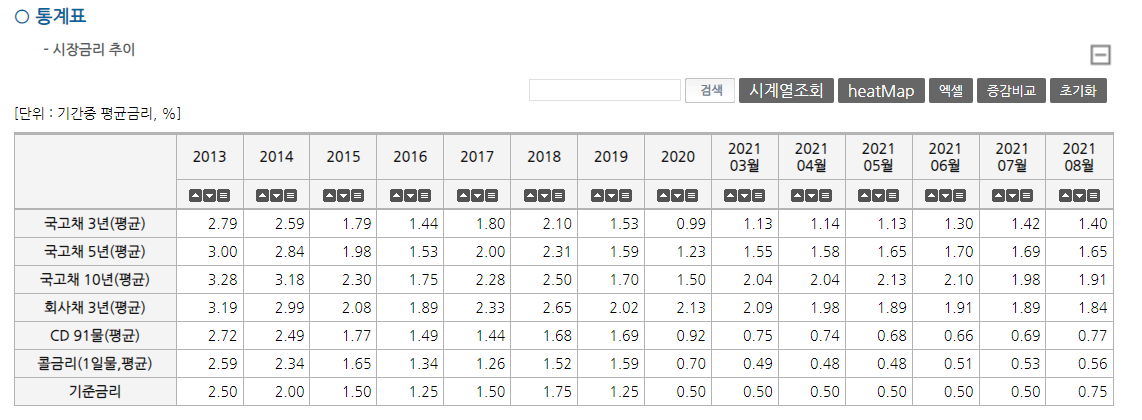

In [15]:
df = interest_rate_trends('data/시장금리추이_2020.xls')

<AxesSubplot:>

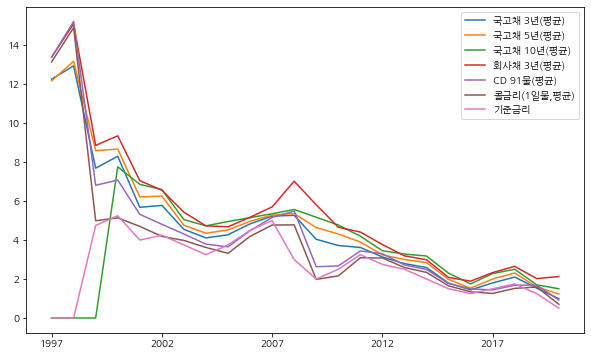

In [16]:
df.plot()

# 분기별 자료

2021/6월 현재 1997에서 2021Q1까지 자료

In [17]:
df = interest_rate_trends('data/시장금리/시장금리추이_2021Q1.xls')

In [18]:
df.head(3)

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
19971/4,12.20,12.08,0.0,12.34,12.72,11.92,12.97
19972/4,12.17,12.03,0.0,12.12,12.55,12.17,11.45
19973/4,11.65,11.70,0.0,12.11,12.65,12.29,14.25


In [19]:
# 2000 이후 자료
df2000 = df.loc[ df.index > '19994/4']

<AxesSubplot:>

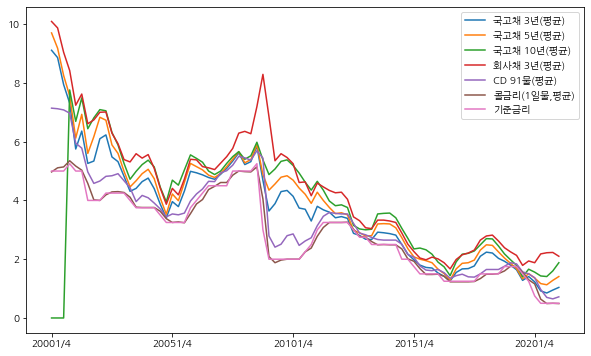

In [20]:
df2000.plot()

In [35]:
# 2010 이후 자료
df2010 = df.loc[ df.index > '20094/4']

<AxesSubplot:>

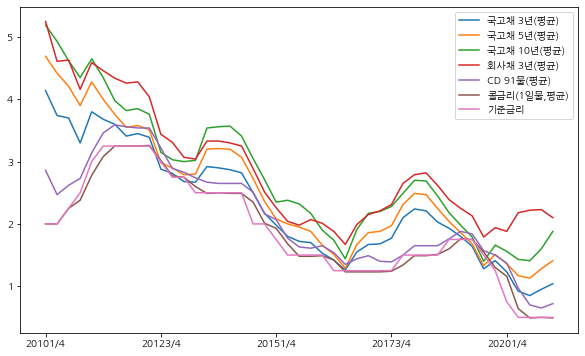

In [36]:
df2010.plot()

In [37]:
# 2018 이후 자료
df2018 = df.loc[ df.index > '20174/4']

<AxesSubplot:>

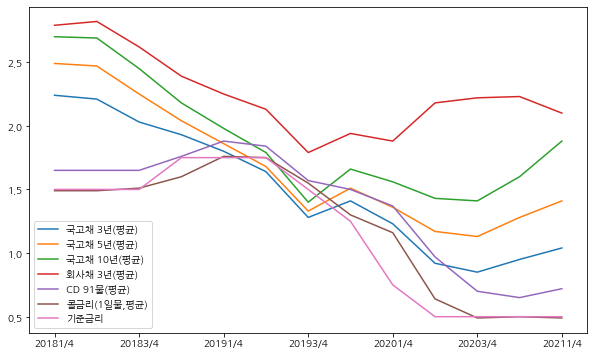

In [38]:
df2018.plot()

# 월별자료

In [52]:
irst_month = interest_rate_trends('data/시장금리/시장금리추이_200101-202105.xls')

In [53]:
irst_month.head(3)

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
2001/01,5.99,6.20,6.65,7.76,6.43,5.32,5.25
2001/02,5.43,5.76,6.41,6.79,5.73,5.15,5.00
2001/03,5.84,6.40,7.00,7.16,5.68,5.05,5.00


In [54]:
irst_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2001/01 to 2021/05
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   국고채 3년(평균)   245 non-null    float64
 1   국고채 5년(평균)   245 non-null    float64
 2   국고채 10년(평균)  245 non-null    float64
 3   회사채 3년(평균)   245 non-null    float64
 4   CD 91물(평균)   245 non-null    float64
 5   콜금리(1일물,평균)  245 non-null    float64
 6   기준금리         245 non-null    float64
dtypes: float64(7)
memory usage: 15.3+ KB


In [57]:
# 2010 이후 자료
df2010 = irst_month.loc[ irst_month.index > '2009/12']

<AxesSubplot:>

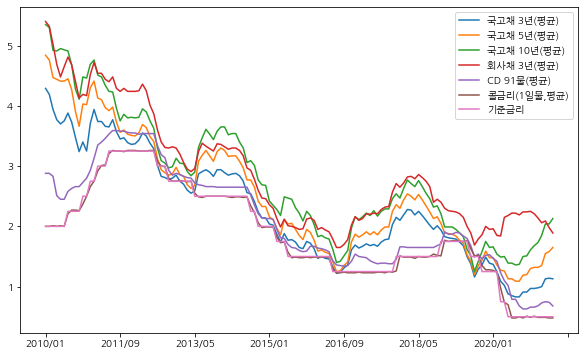

In [58]:
df2010.plot()

<AxesSubplot:>

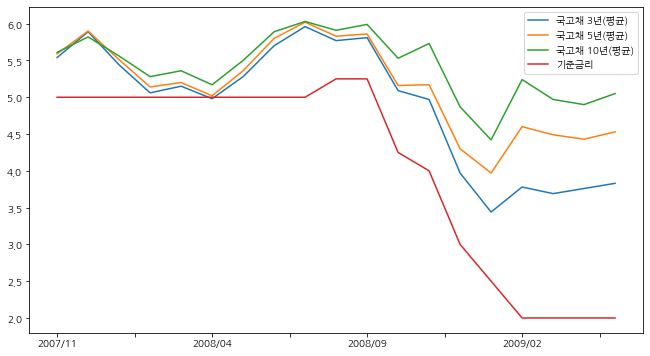

In [62]:
# 2007~2009 이후 자료
df07_09 = irst_month.loc[ (irst_month.index > '2007/10') & (irst_month.index < '2009/06')]
df07_09.iloc[:, [0,1,2,6]].plot(figsize=(11,6)) 

<AxesSubplot:>

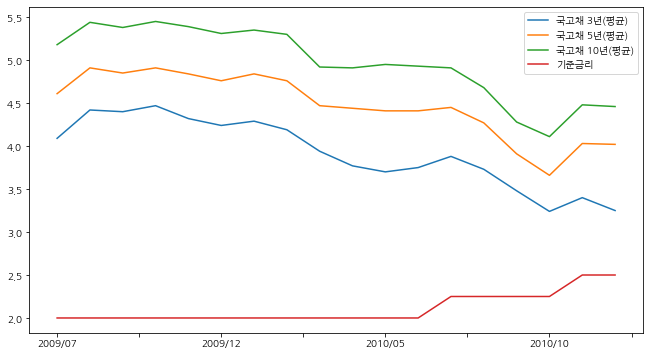

In [63]:
# 2009/07 ~ 2010 자료
df07_09 = irst_month.loc[ (irst_month.index > '2009/06') & (irst_month.index < '2011/01')]
df07_09.iloc[:, [0,1,2,6]].plot(figsize=(11,6)) 

2010년 이후는 COFIX와 분석을 해보자.

# 시장금리 추이와 COFIX 분석

In [45]:
interrest_cofix = merge_interest_cofix('data/시장금리/시장금리추이_200101-202105.xls',
                          'data/시장금리/COFIX통계(2010_2020).xlsx', 
                          'data/시장금리/COFIX통계(2021년도)_20210626.xlsx')

In [49]:
#  이후
ic2007_9 = interrest_cofix[(interrest_cofix.index > '2006/10') & (interrest_cofix.index > '2010/12')]

<AxesSubplot:xlabel='index'>

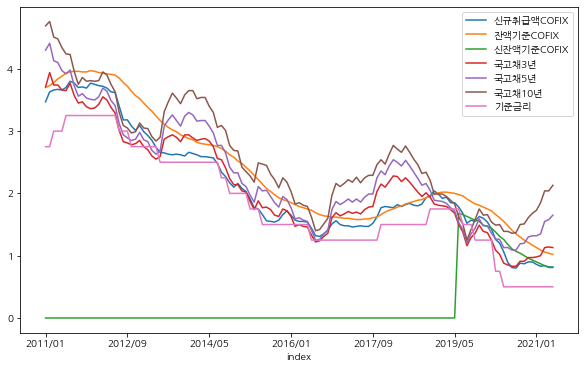

In [50]:
ic2007_9.iloc[:, [1,2,3,4,5,6,10]].plot(figsize=(10,6))

<AxesSubplot:xlabel='index'>

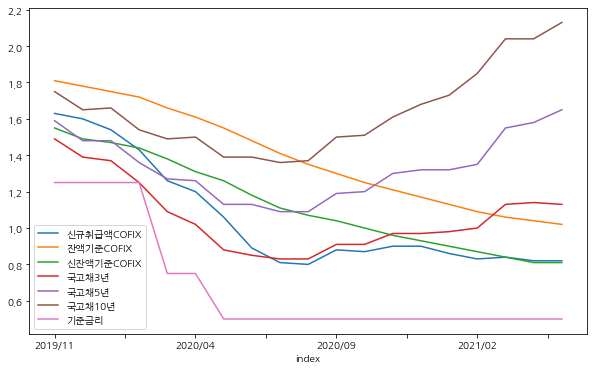

In [48]:
# 2019/11 이후
interrest_cofix[interrest_cofix.index > '2019/10'].iloc[:, [1,2,3,4,5,6,10]].plot(figsize=(10,6))

<AxesSubplot:xlabel='index'>

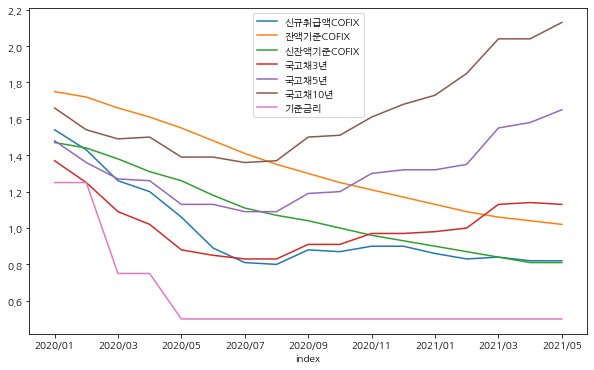

In [223]:
interrest_cofix[interrest_cofix.index > '2019/12'].iloc[:, [1,2,3,4,5,6,10]].plot(figsize=(10,6))